## Prediction Using Unsupervised model

<h3>Objective</h3>

> The objective of this task is to predict the optimum number of clusters in the Iris dataset by KMeans 
  and its visualisation using Matplotlib.

### <B> by : YOGITA PAPNEY</B>

<h4>Import libraries</h4>

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

<h4>Load Iris dataset</h4>

In [3]:
iris=load_iris()
df = pd.DataFrame(iris['data'], columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<h4>Information about Iris dataset</h4>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
X=df.iloc[:,:].values
X.shape

(150, 4)

<H4> Finding the optimum number of clusters Using k-means classification for Iris dataset</H4>

In [7]:
wsse=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,max_iter=100,n_init=10)
    km.fit(X)
    wsse.append(km.inertia_)

<h4>Plotting a line graph between wsse and no. of clusters</h4>

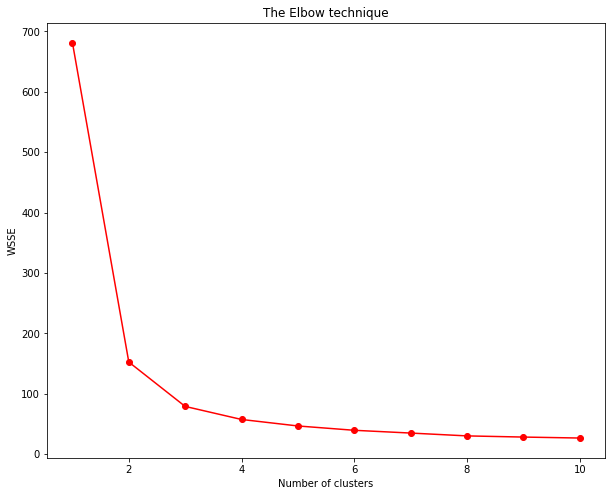

In [28]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wsse,marker='o',c='r')
plt.title('The Elbow technique')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')# within cluster sum of squares error
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 3.

<h4> Applying kmeans to the dataset</h4>

In [9]:
km = KMeans(n_clusters = 3, max_iter = 100, n_init = 10)
pred_km = km.fit_predict(X)

<h4> Visualising the predicted outputs </h4>

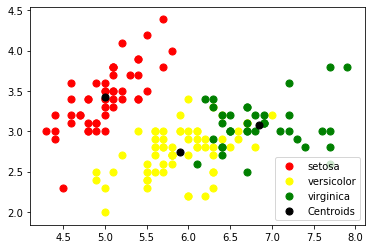

In [14]:
plt.scatter(X[pred_km == 0,0],X[pred_km == 0,1],s = 50, c = 'red', label = 'setosa')
plt.scatter(X[pred_km == 1,0],X[pred_km == 1,1],s = 50, c = 'yellow', label = 'versicolor')
plt.scatter(X[pred_km == 2,0],X[pred_km == 2,1],s = 50, c = 'green', label= 'virginica')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s = 50,c= 'black', label = 'Centroids')
plt.legend()

<h4>Till here, our model is completed.we predict the no. of clusters and outputs</h4>
<hr>
<h5>Now,As we are working on Iris dataset and we know the actual outputs.so now we are going to check the accuracy of our model,</h5>


#### Loading target vector of Iris dataset and visualise them

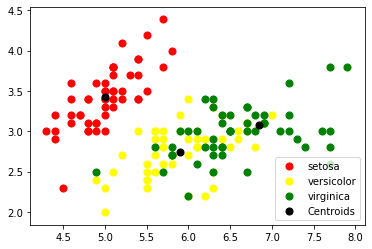

In [11]:
y=iris['target']
plt.scatter(X[y == 0,0],X[y == 0,1],s = 50, c = 'red', label = 'setosa')
plt.scatter(X[y == 1,0],X[y == 1,1],s = 50, c = 'yellow', label = 'versicolor')
plt.scatter(X[y == 2,0],X[y == 2,1],s = 50, c = 'green', label= 'virginica')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s = 50,c= 'black', label = 'Centroids')
plt.legend()

<h4>Evaluating the accuracy of the model</h4>

In [18]:
from sklearn.metrics import accuracy_score
print("Score:",accuracy_score(y,pred_km))

Score: 0.8933333333333333
